In [1]:
import pandas as pd
import numpy as np
import statistics as stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Mobile_data.csv')
a=df.copy()

In [3]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [4]:
df.price_range=df.price_range.replace({0:'low cost',1:'medium cost',2:'high cost',3:'very high cost'})

In [5]:
df.shape

(2000, 15)

In [6]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [7]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range       object
dtype: object

In [8]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


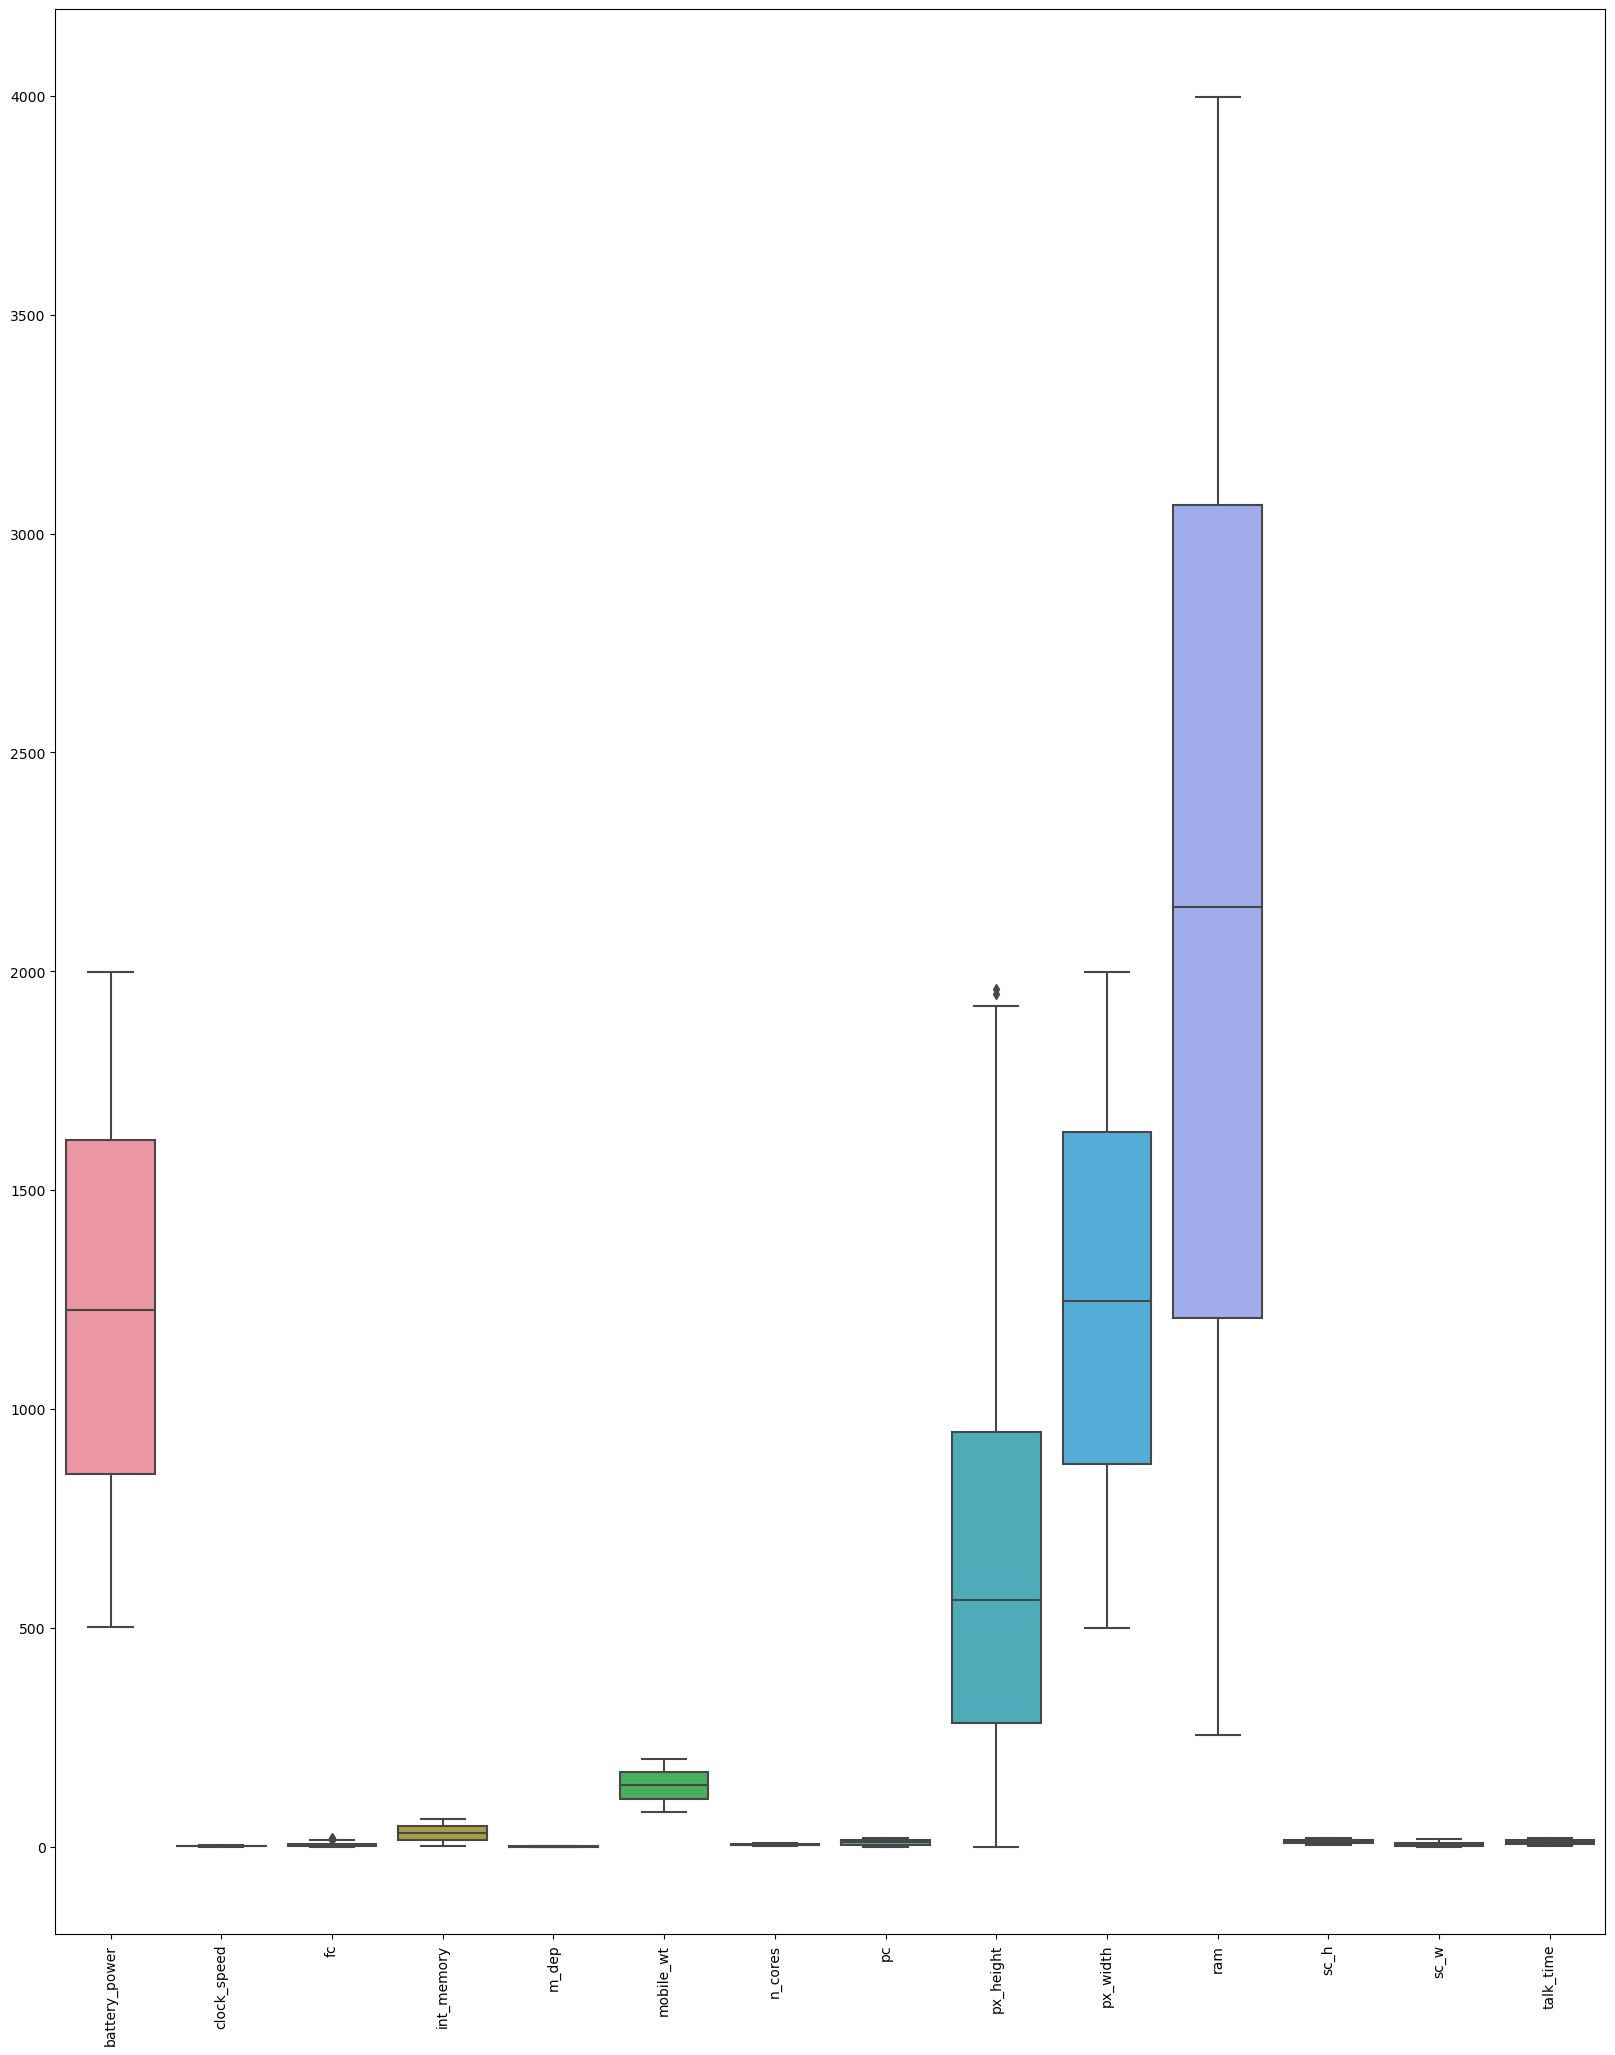

In [9]:
fig, ax = plt.subplots(figsize=(20,25))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [10]:
x=df.drop(['price_range'],axis=1)
y=df.price_range

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [12]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_test.value_counts()

very high cost    163
low cost          151
high cost         151
medium cost       135
Name: price_range, dtype: int64

In [14]:
model.score(x_train,y_train)

0.635

In [15]:
model.score(x_test,y_test)

0.635

In [16]:
modelk=KNeighborsClassifier(n_neighbors=5,p=2)
modelk.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
modelk.score(x_train,y_train)

0.9442857142857143

In [18]:
modelk.score(x_test,y_test)

0.925

In [19]:
modelk=KNeighborsClassifier(n_neighbors=15,p=2,weights='distance',n_jobs=None,leaf_size=40)
modelk.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=40, n_neighbors=15, weights='distance')

In [20]:
modelk.score(x_train,y_train)

1.0

In [21]:
modelk.score(x_test,y_test)

0.95

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [23]:
MSE=[1-x for x in cv_scores]
MSE

[0.09099999999999997,
 0.07499999999999996,
 0.0764999999999999,
 0.0734999999999999,
 0.07199999999999984,
 0.06649999999999989,
 0.06900000000000017,
 0.0684999999999999,
 0.0684999999999999,
 0.06799999999999995,
 0.06599999999999984,
 0.0684999999999999,
 0.07050000000000023,
 0.06899999999999995,
 0.06899999999999995,
 0.0695,
 0.07049999999999979,
 0.07050000000000001,
 0.07300000000000006,
 0.07099999999999995,
 0.07400000000000007,
 0.07250000000000001,
 0.07150000000000001,
 0.07400000000000007,
 0.0734999999999999,
 0.0734999999999999,
 0.0754999999999999,
 0.07699999999999996,
 0.07499999999999996,
 0.07600000000000018,
 0.07650000000000001,
 0.07650000000000001,
 0.07499999999999996,
 0.07300000000000006,
 0.07750000000000001,
 0.07699999999999996,
 0.07899999999999996,
 0.07799999999999996,
 0.07950000000000013,
 0.08200000000000007,
 0.08150000000000013,
 0.08349999999999991,
 0.08200000000000007,
 0.08550000000000002,
 0.08449999999999991,
 0.0824999999999999,
 0.0820000

In [24]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

21

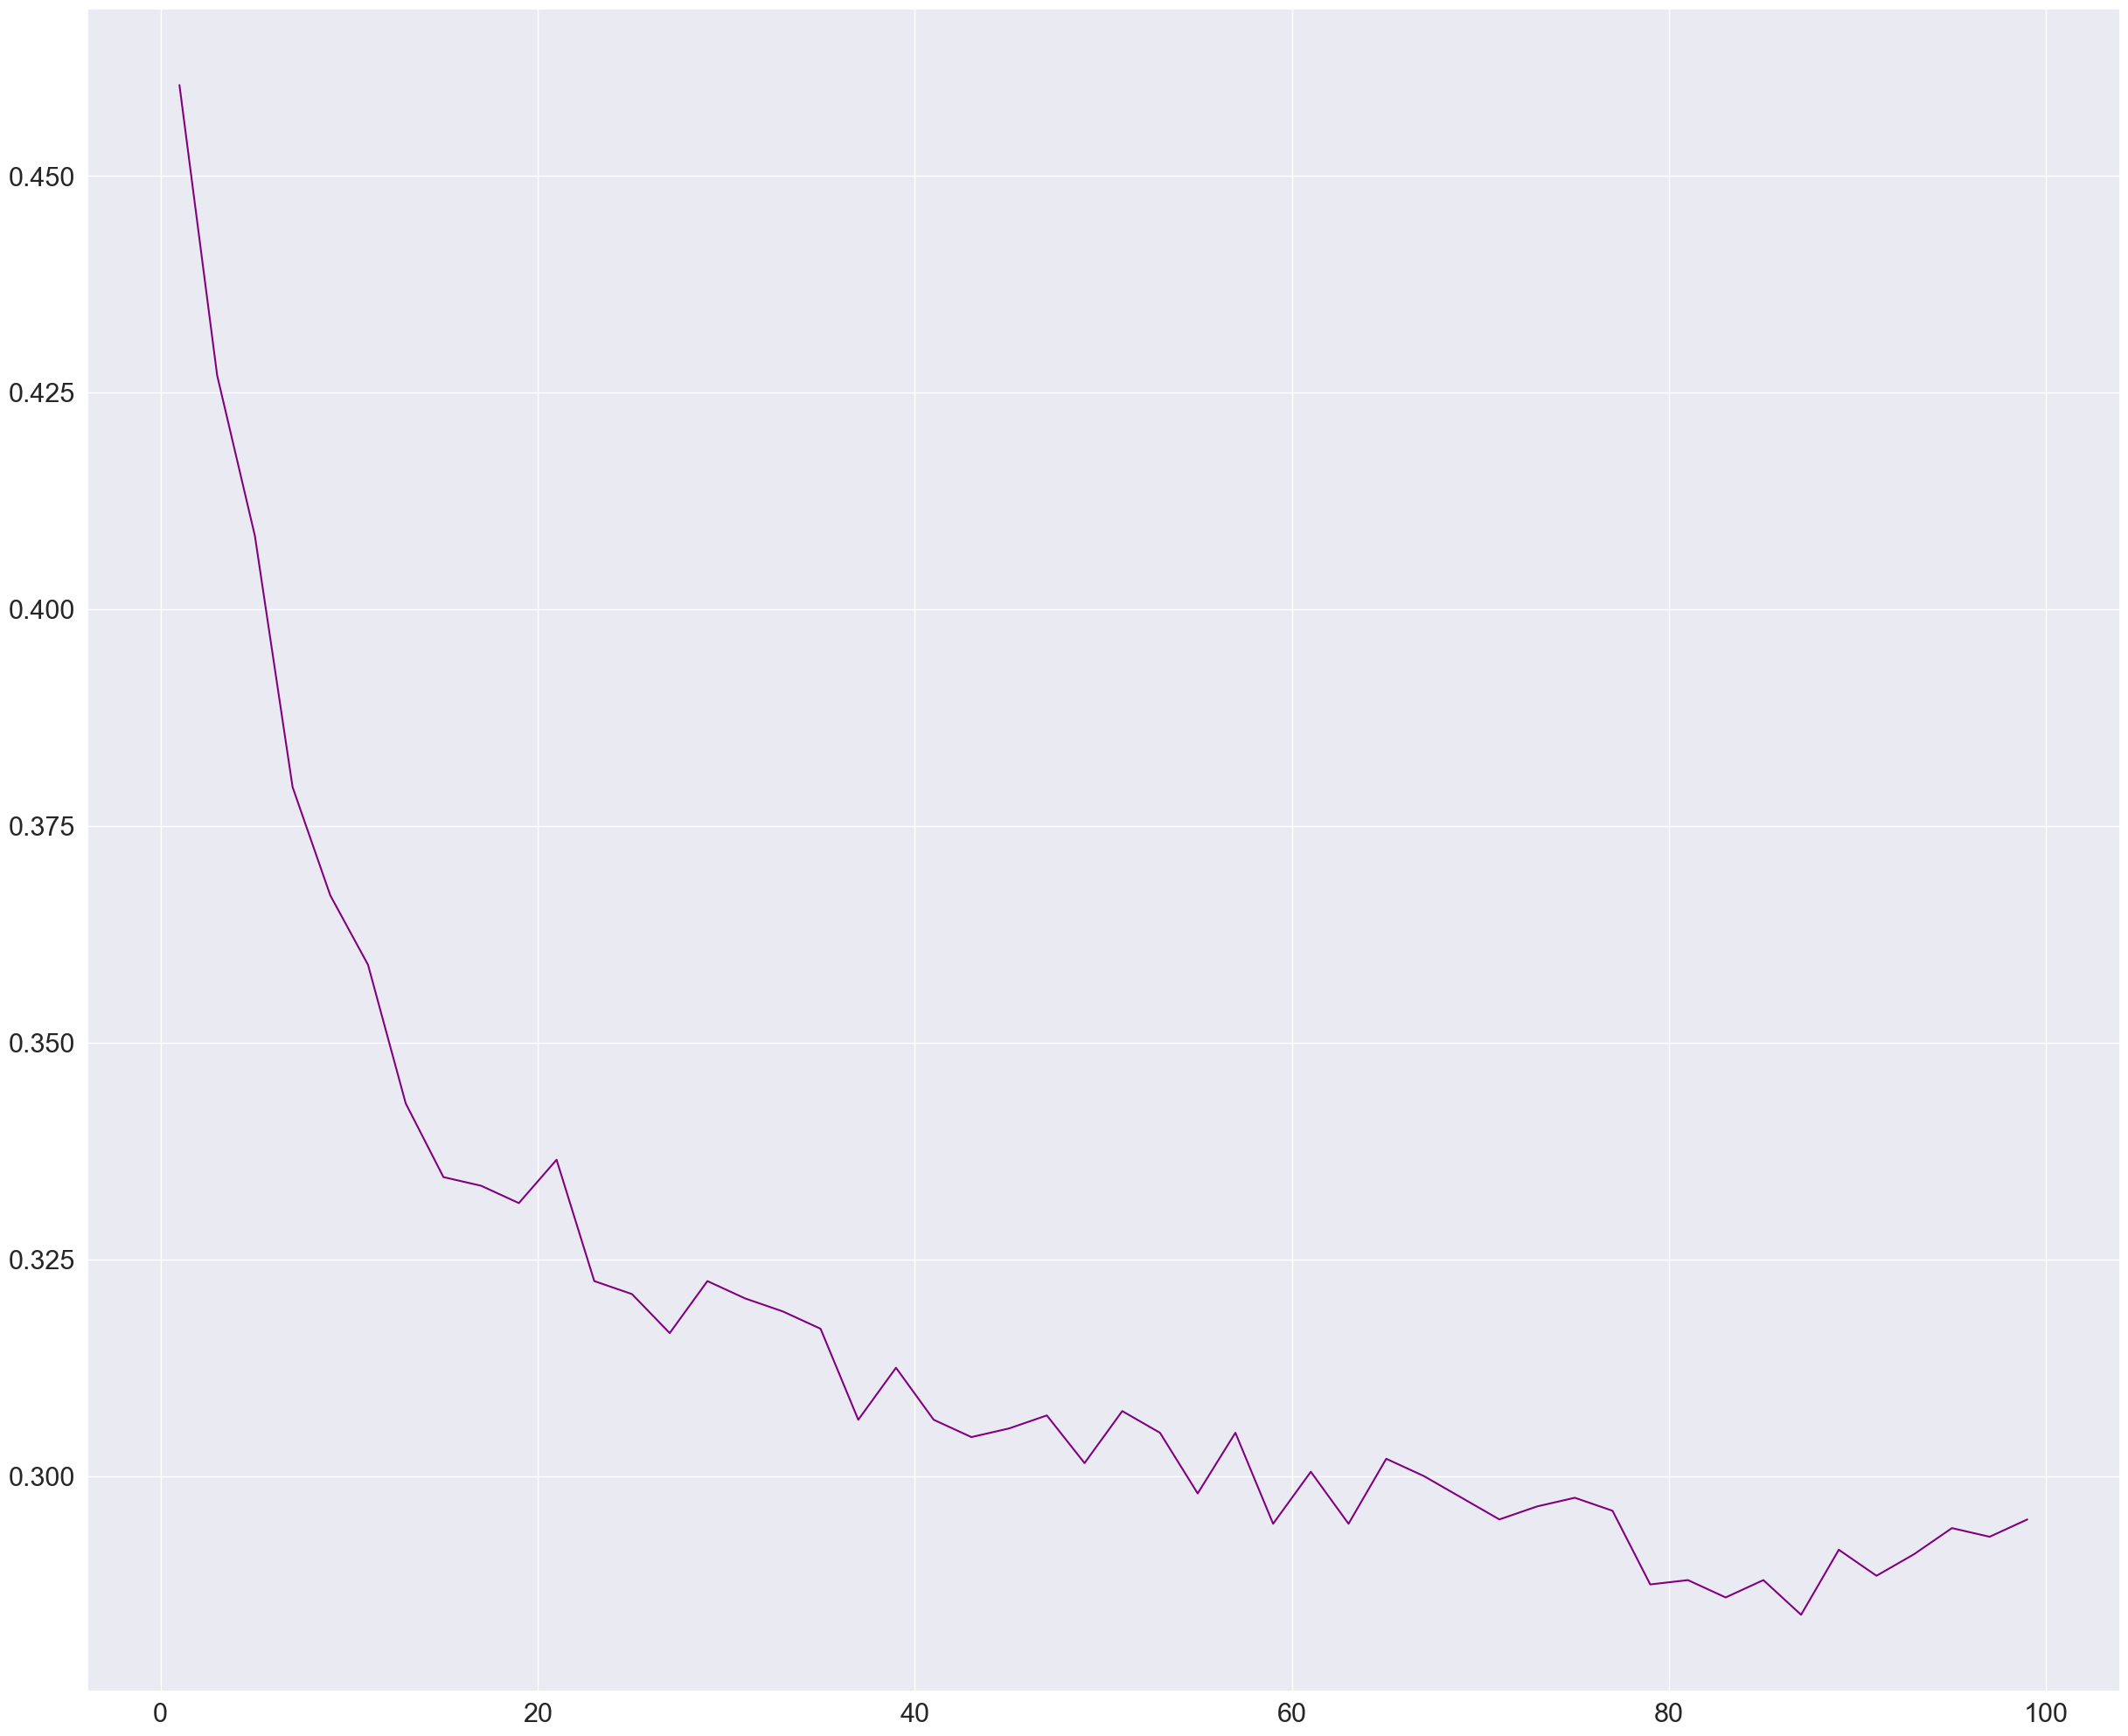

In [67]:
plt.plot(neighbors,MSE,color='purple')

In [26]:
xscale=x.apply(zscore)

In [27]:
xscale.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.545430e-16,5.861978e-17,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


In [29]:
from sklearn.metrics import classification_report

In [64]:
report = classification_report(y_test, y_pred, output_dict=True)
adf = pd.DataFrame(report).transpose()
adf

,precision,recall,f1-score,support
high cost,0.931973,0.907285,0.919463,151.00
low cost,0.961783,1.000000,0.980519,151.00
medium cost,0.954545,0.933333,0.943820,135.00
very high cost,0.951220,0.957055,0.954128,163.00
accuracy,0.950000,0.950000,0.950000,0.95
macro avg,0.949880,0.949418,0.949483,600.00
weighted avg,0.949783,0.950000,0.949727,600.00


In [32]:
x1_train,x1_test,y1_train,y1_test=train_test_split(xscale,y,test_size=0.30,random_state=0)

In [33]:
modelk1=KNeighborsClassifier(n_neighbors=81,p=1)
modelk1.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=81, p=1)

In [34]:
modelk1.score(x1_train,y1_train)

0.81

In [35]:
modelk1.score(x1_test,y1_test)

0.8

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xscale,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [37]:
MSE=[1-x for x in cv_scores]
MSE

[0.4604999999999999,
 0.42699999999999994,
 0.4085,
 0.37949999999999995,
 0.3670000000000001,
 0.3589999999999999,
 0.34299999999999997,
 0.3345,
 0.3335,
 0.3314999999999999,
 0.3364999999999999,
 0.3225,
 0.32099999999999995,
 0.3164999999999999,
 0.3225,
 0.3205,
 0.31900000000000006,
 0.31699999999999995,
 0.3065,
 0.3125000000000001,
 0.3065000000000001,
 0.3045,
 0.3055000000000001,
 0.30700000000000005,
 0.3015000000000001,
 0.3075,
 0.30499999999999994,
 0.29800000000000004,
 0.30500000000000005,
 0.2945,
 0.3004999999999999,
 0.2945,
 0.30199999999999994,
 0.30000000000000004,
 0.2975000000000001,
 0.29500000000000015,
 0.2965000000000001,
 0.2975000000000001,
 0.29600000000000004,
 0.2875,
 0.28800000000000003,
 0.28600000000000003,
 0.2879999999999999,
 0.28400000000000003,
 0.2915,
 0.2885,
 0.29100000000000004,
 0.29399999999999993,
 0.2929999999999999,
 0.29500000000000004]

In [38]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

87

In [39]:
modelk1=KNeighborsClassifier(n_neighbors=79,p=2)
modelk1.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=79)

In [40]:
modelk1.score(x1_train,y1_train)

0.7121428571428572

In [41]:
modelk1.score(x1_test,y1_test)

0.7166666666666667

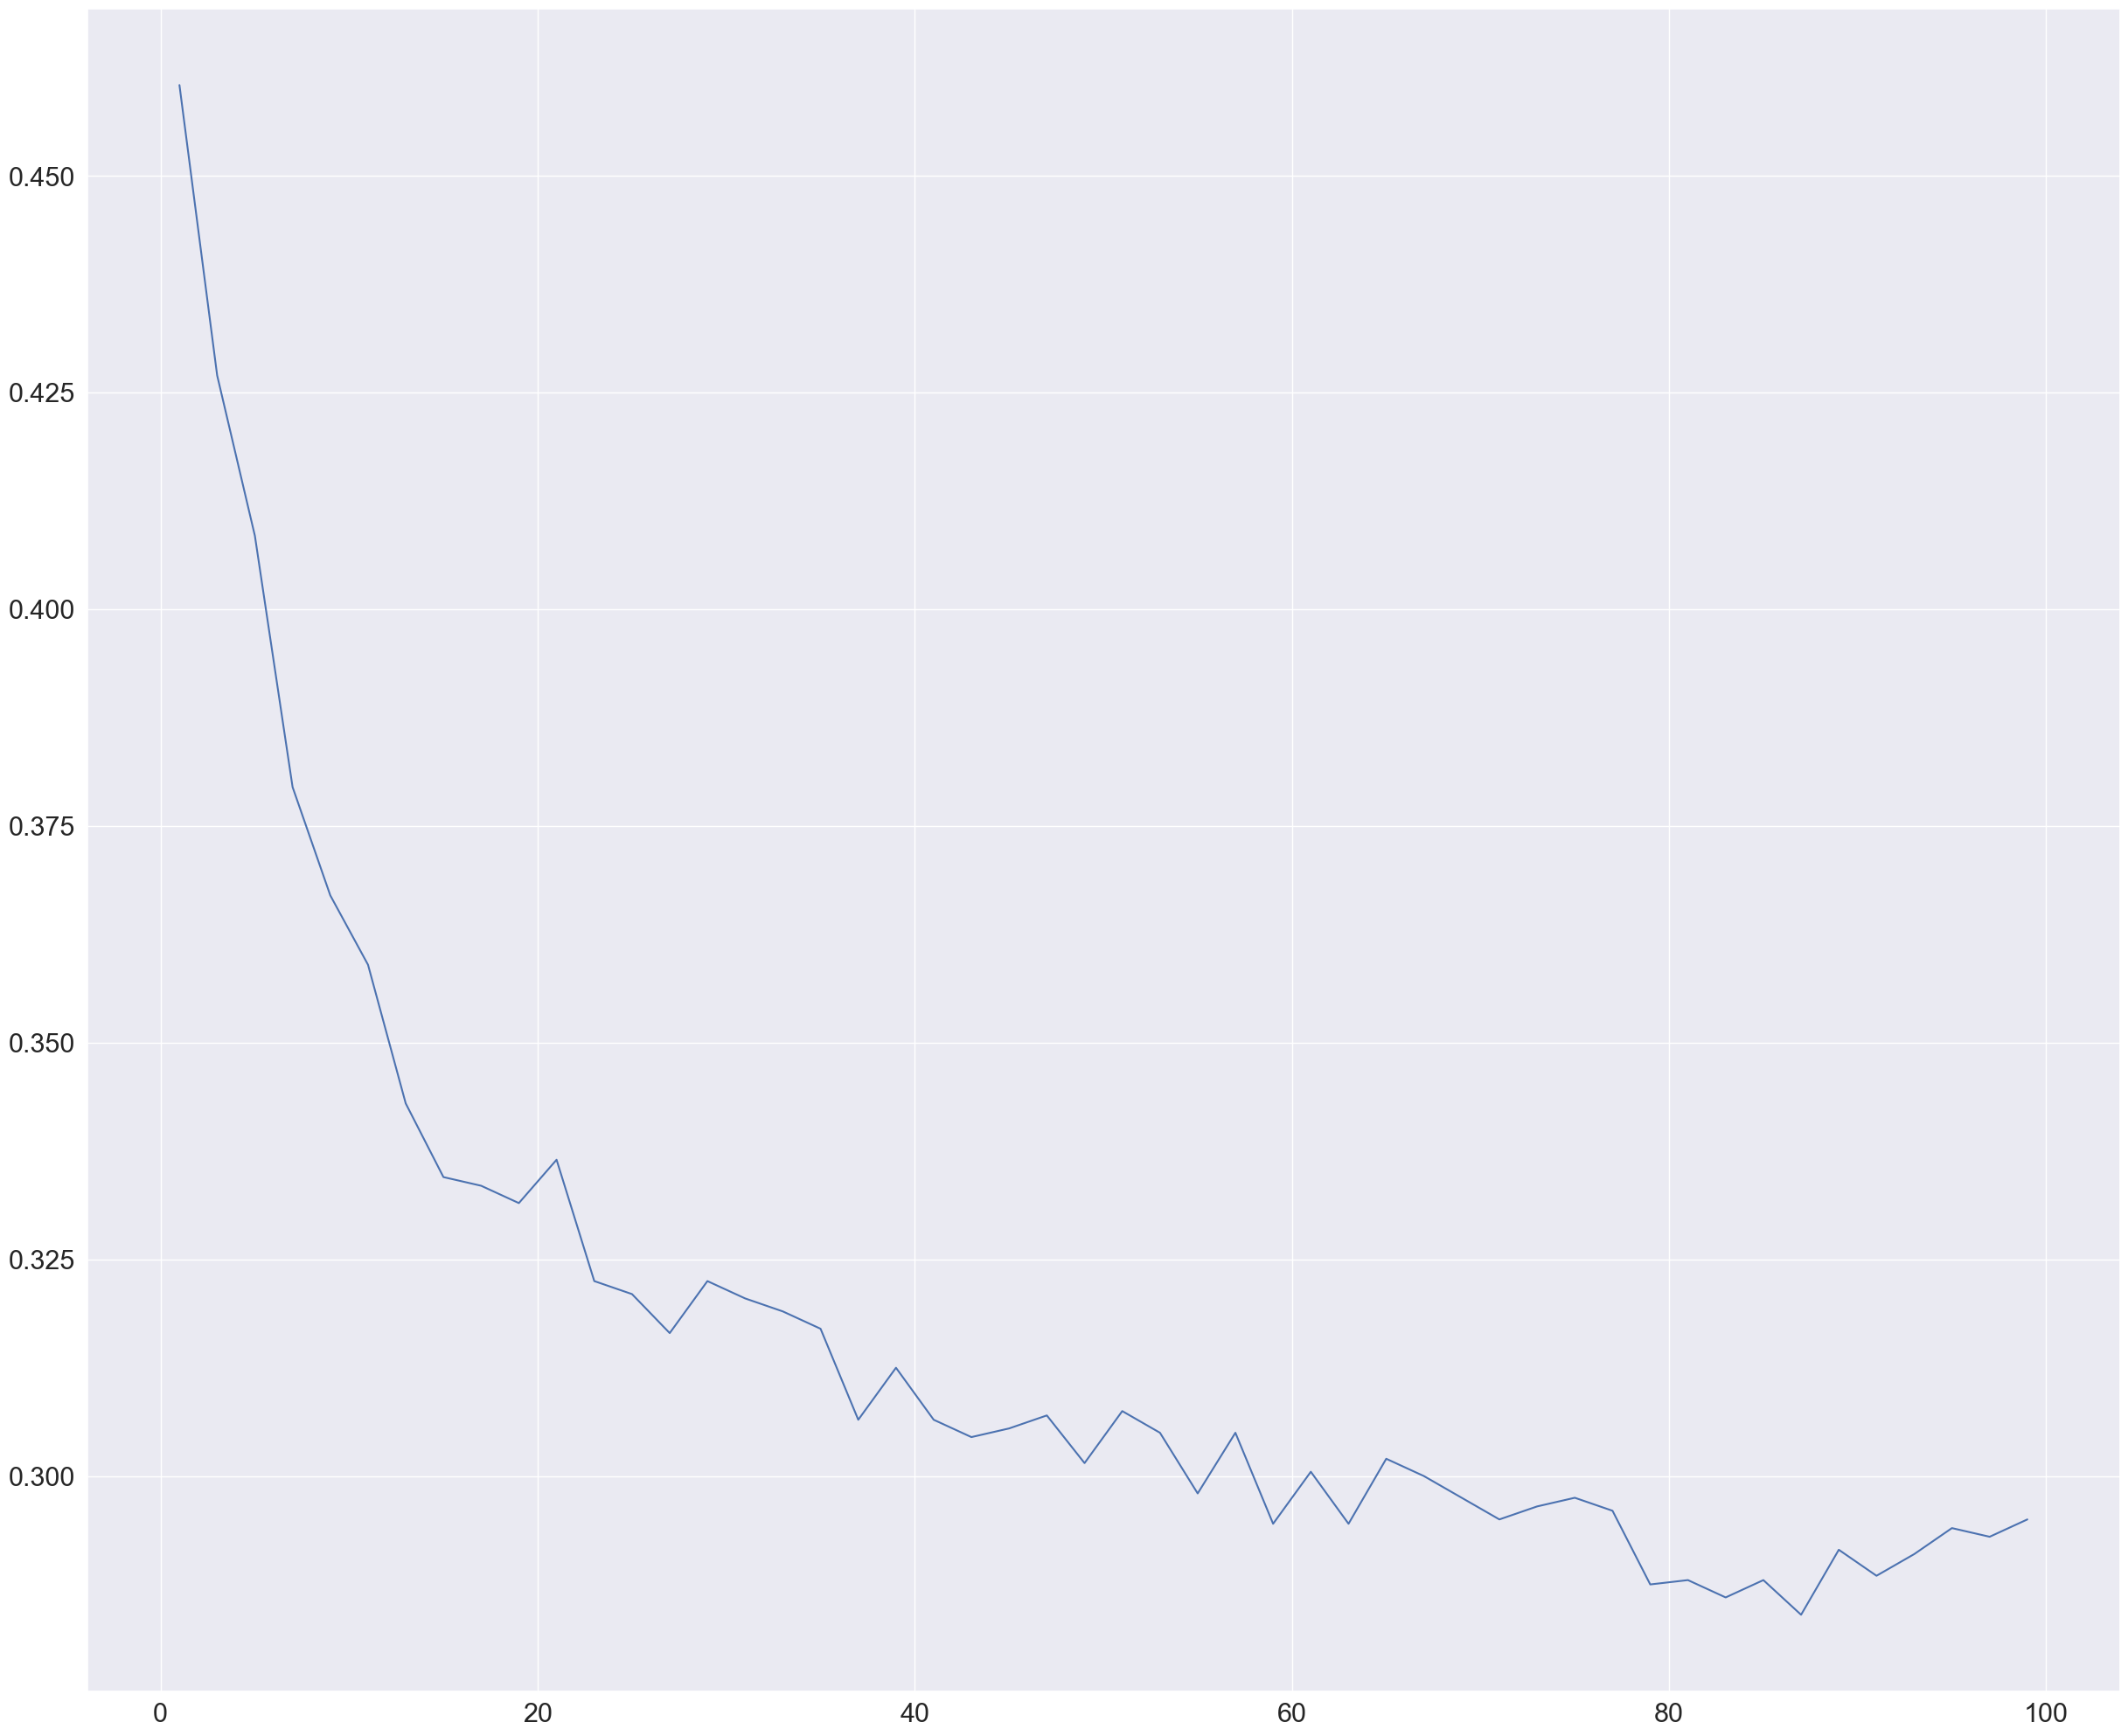

In [68]:
plt.plot(neighbors,MSE)

In [43]:
y_pred = modelk.predict(x_test)
modelk.predict_proba(x_test)[:,0]

array([0.05639516, 0.        , 0.94323749, 0.7053266 , 0.53590091,
       0.        , 0.        , 0.4264264 , 0.16530484, 0.        ,
       0.        , 0.        , 0.        , 0.95496878, 0.        ,
       0.        , 0.        , 1.        , 0.94243562, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.65616667,
       0.87291626, 0.        , 0.        , 0.        , 0.10381499,
       0.2256404 , 0.        , 0.8898411 , 0.        , 0.36816567,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.52875627, 0.17481171, 0.        , 0.46627715, 0.        ,
       0.        , 0.        , 0.16347794, 0.21682344, 0.05571297,
       0.        , 0.32887349, 0.        , 0.13156499, 0.        ,
       0.49307601, 0.7156097 , 0.71109245, 0.        , 0.30136097,
       0.3142772 , 0.        , 0.15576283, 0.95880555, 0.05550343,
       0.76343032, 0.        , 0.68245285, 0.53745702, 0.87911697,
       0.        , 0.88904427, 0.        , 0.        , 0.     

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[137,   0,   6,   8],
       [  0, 151,   0,   0],
       [  3,   6, 126,   0],
       [  7,   0,   0, 156]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     high cost       0.93      0.91      0.92       151
      low cost       0.96      1.00      0.98       151
   medium cost       0.95      0.93      0.94       135
very high cost       0.95      0.96      0.95       163

      accuracy                           0.95       600
     macro avg       0.95      0.95      0.95       600
  weighted avg       0.95      0.95      0.95       600



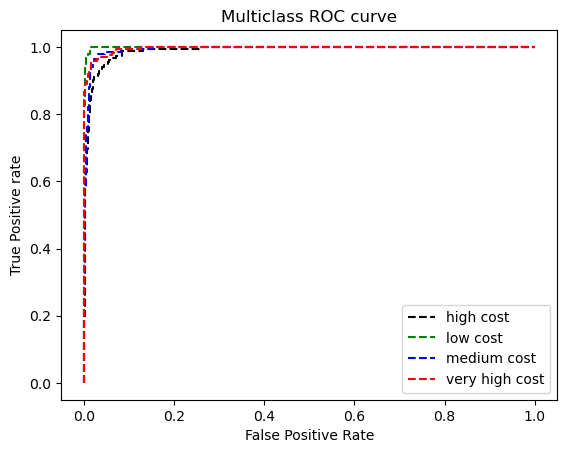

In [46]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# fit model
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=15,p=2,weights='distance',n_jobs=None,leaf_size=40))
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4
pos=['high cost','low cost','medium cost','very high cost']

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=pos[i])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='black', label='high cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='low cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='medium cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='very high cost')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[137,   0,   6,   8],
       [  0, 151,   0,   0],
       [  3,   6, 126,   0],
       [  7,   0,   0, 156]], dtype=int64)

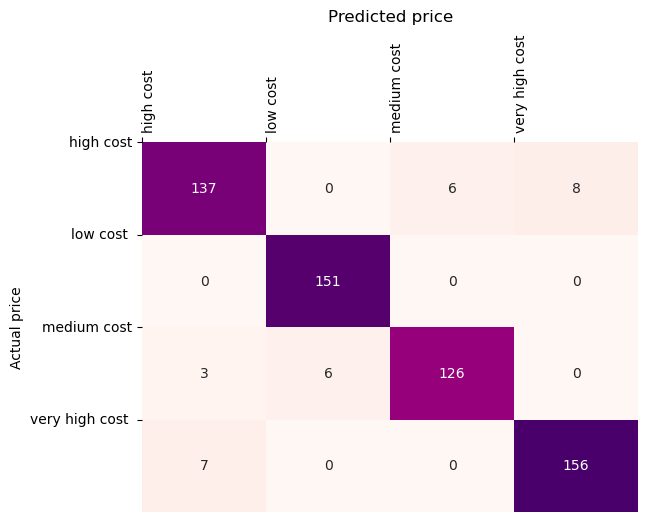

In [48]:
fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',cbar=False)
ax.xaxis.tick_top()
plt.title('Predicted price')
plt.ylabel('Actual price')
plt.xticks([0,1,2,3],['high cost','low cost ','medium cost','very high cost '],rotation=90,ha='left')
plt.yticks([0,1,2,3],['high cost','low cost ','medium cost','very high cost '],rotation=0)


plt.show()

In [49]:
df.shape

(2000, 15)

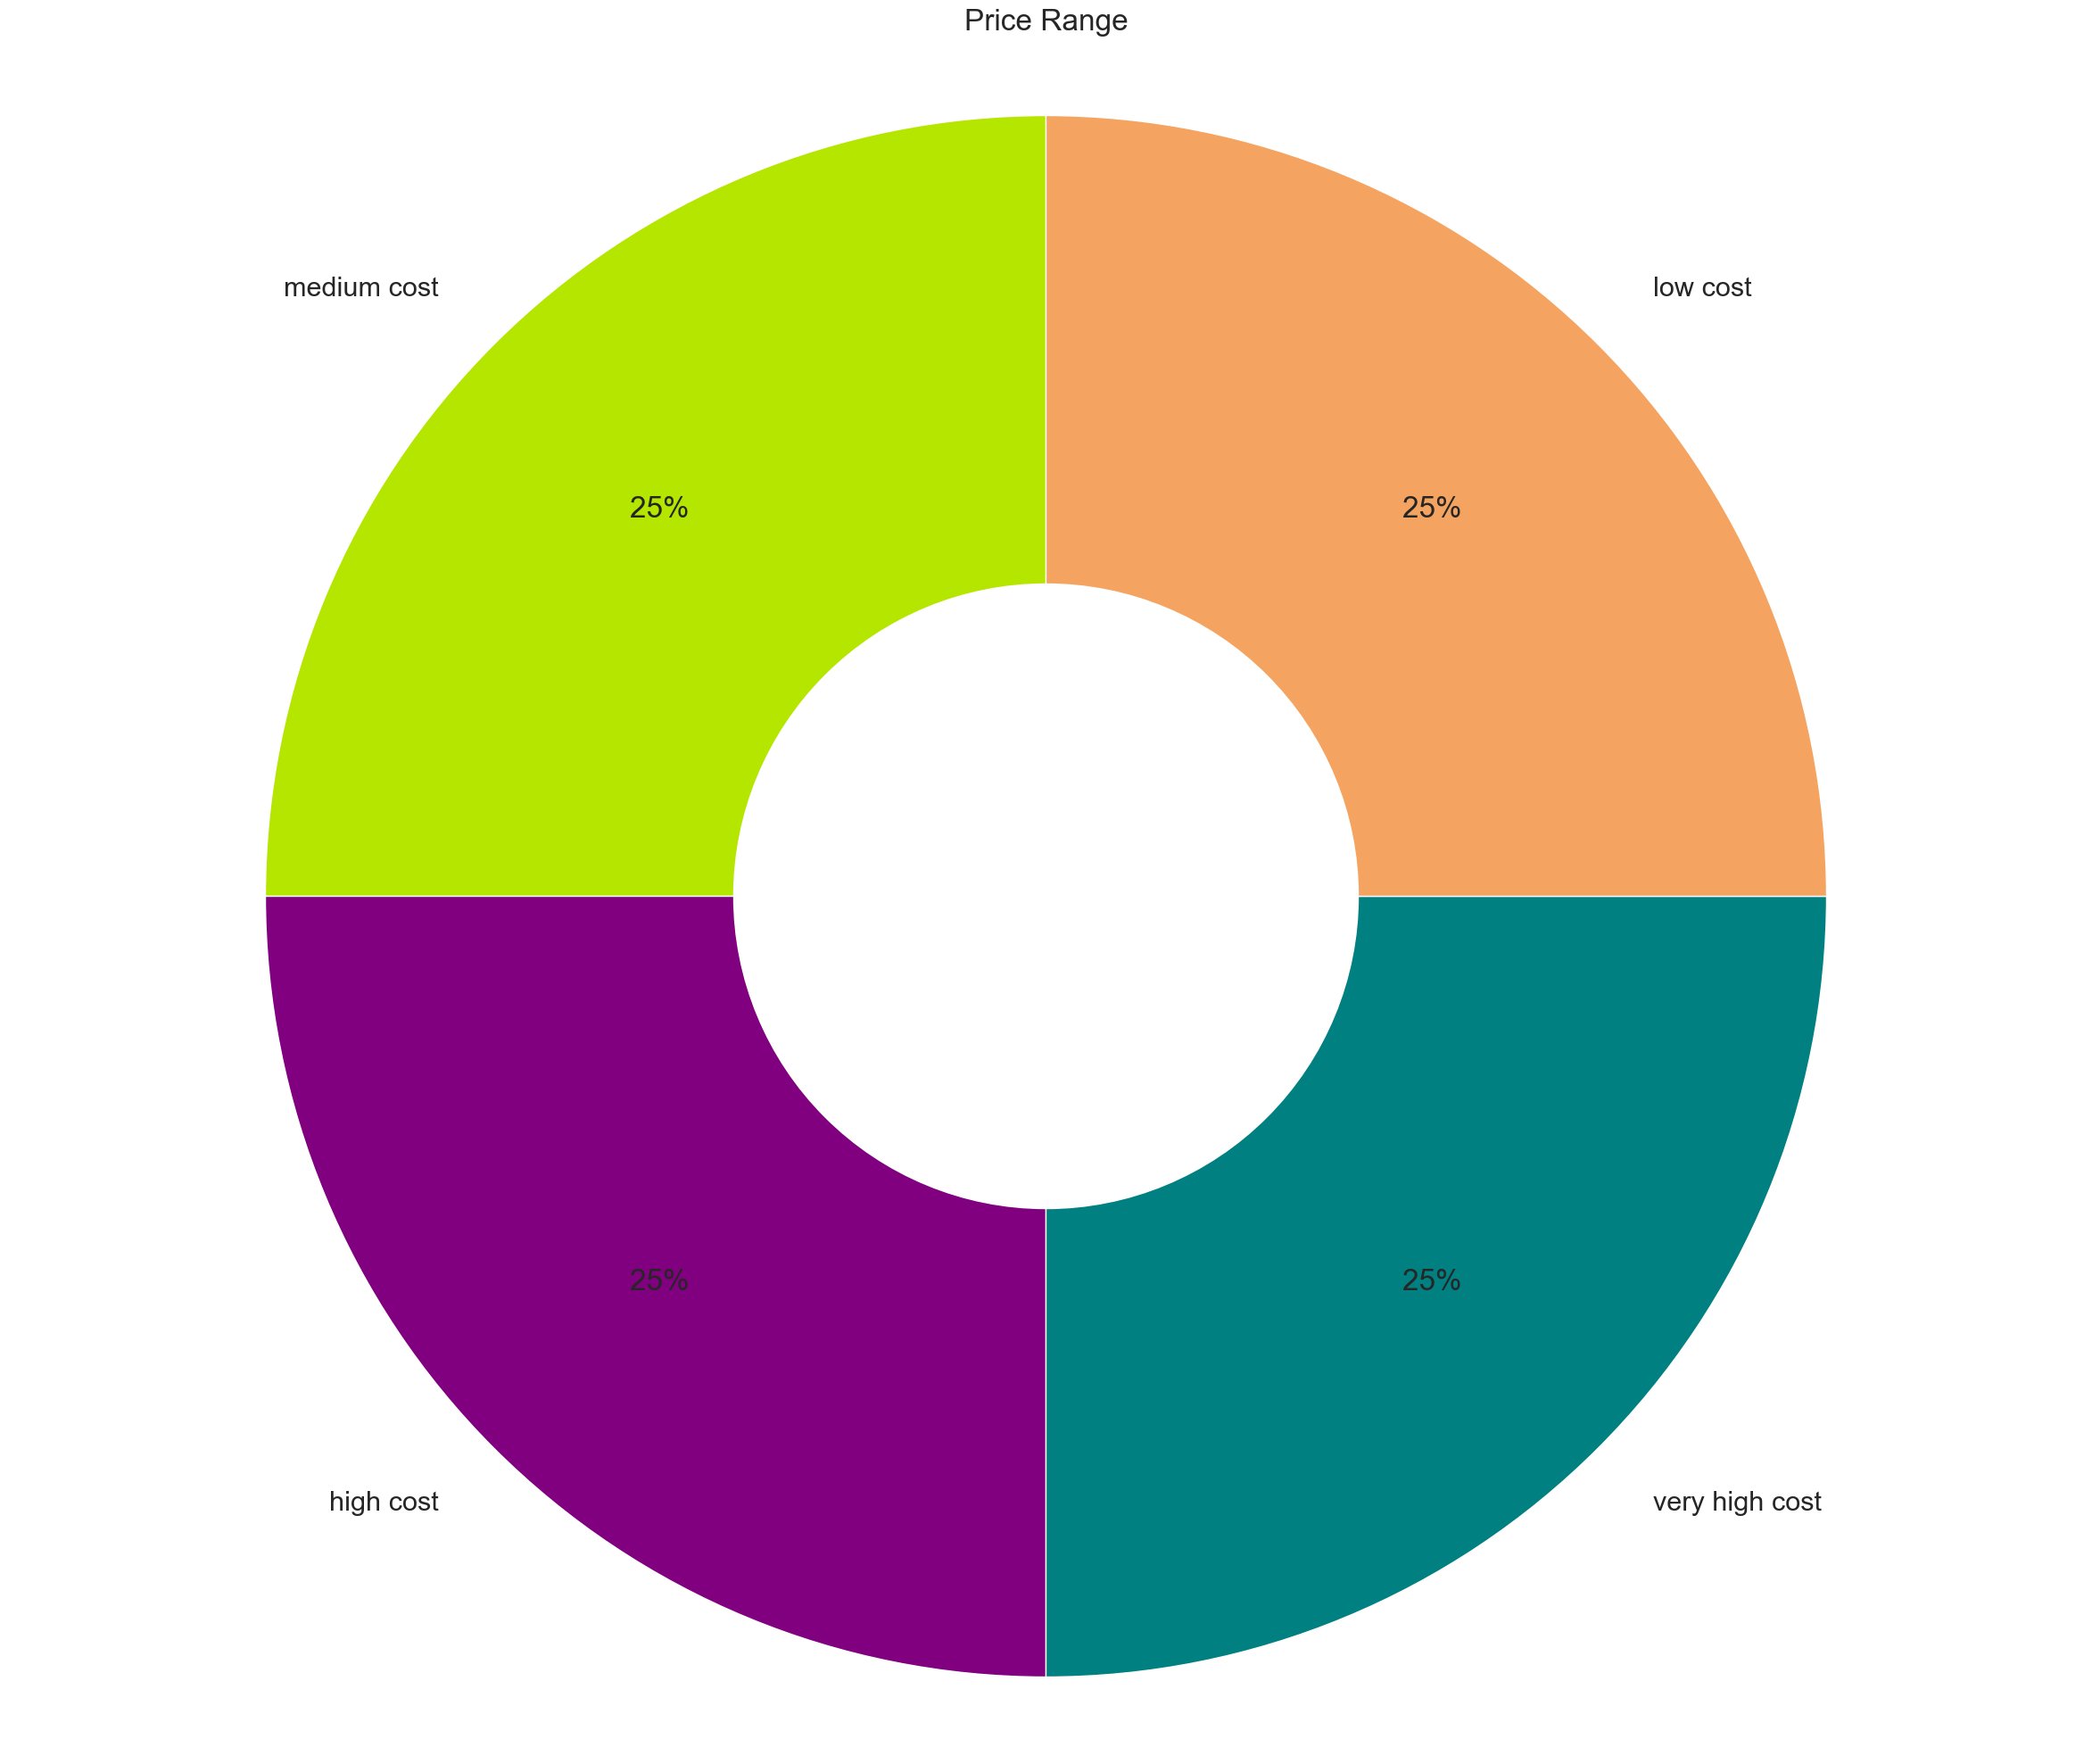

In [66]:
freq = df['price_range'].value_counts()
counts = freq.to_list()
keys = freq.keys().to_list()
colors = ["#b4e600","#800080","#008080","#F4A460"]
plt.pie(x=counts,labels = keys,colors=colors,autopct='%1.0f%%',startangle=90, pctdistance=0.70)
circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Price Range")
plt.show()

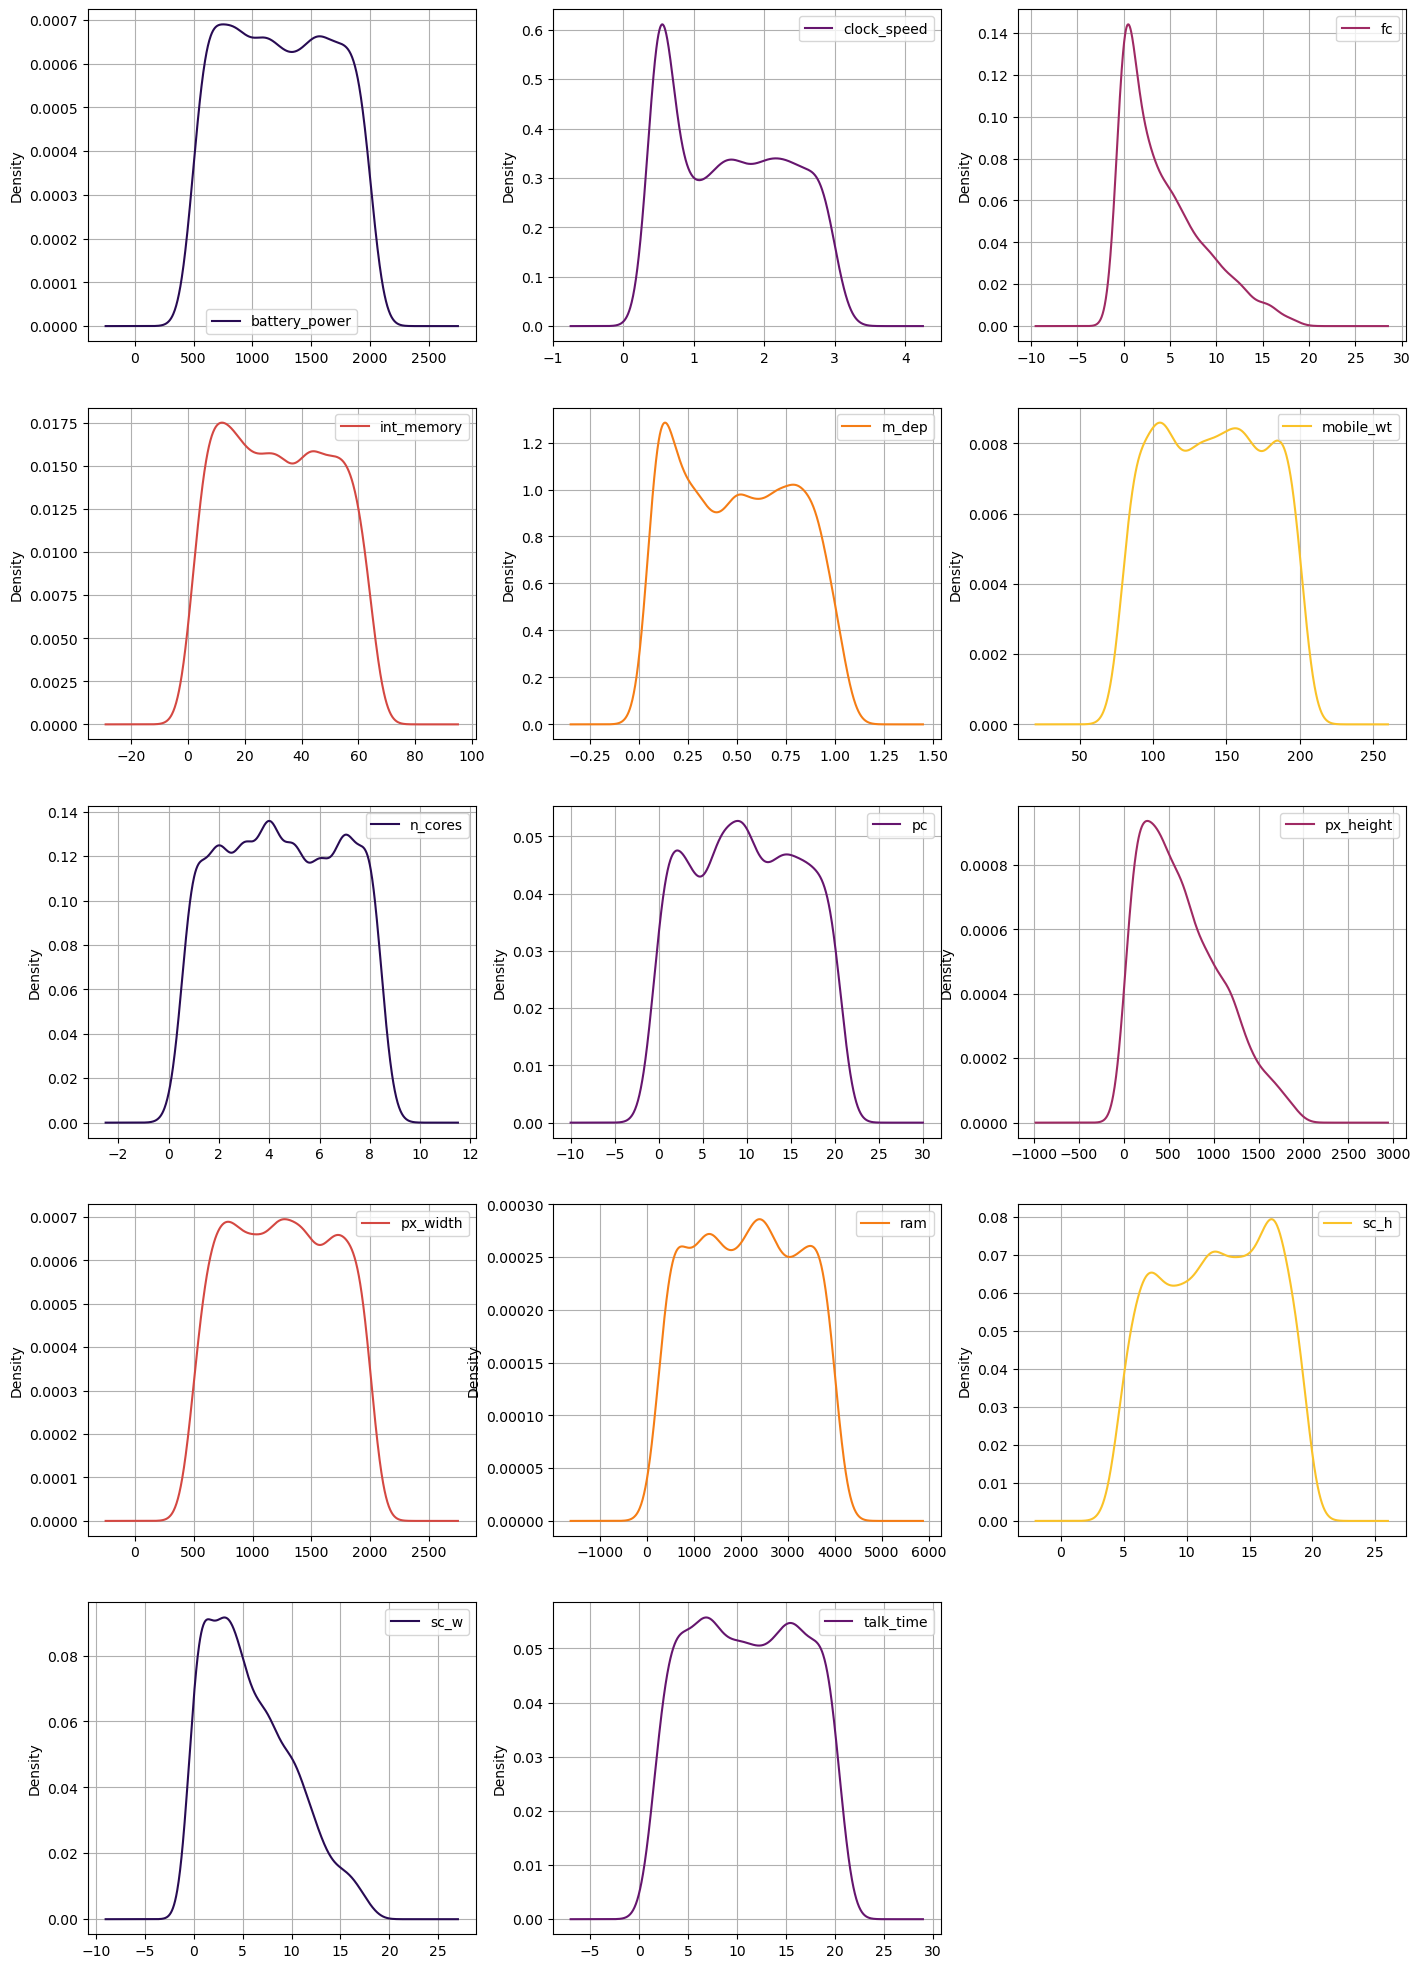

In [50]:
plt.rcParams['figure.figsize']=(30,25)

colors = sns.color_palette("inferno")

df.plot(kind='density',subplots=True, layout=(5,3), sharex=False, sharey=False , figsize =(17,25) , color = colors, grid = True )

plt.show()

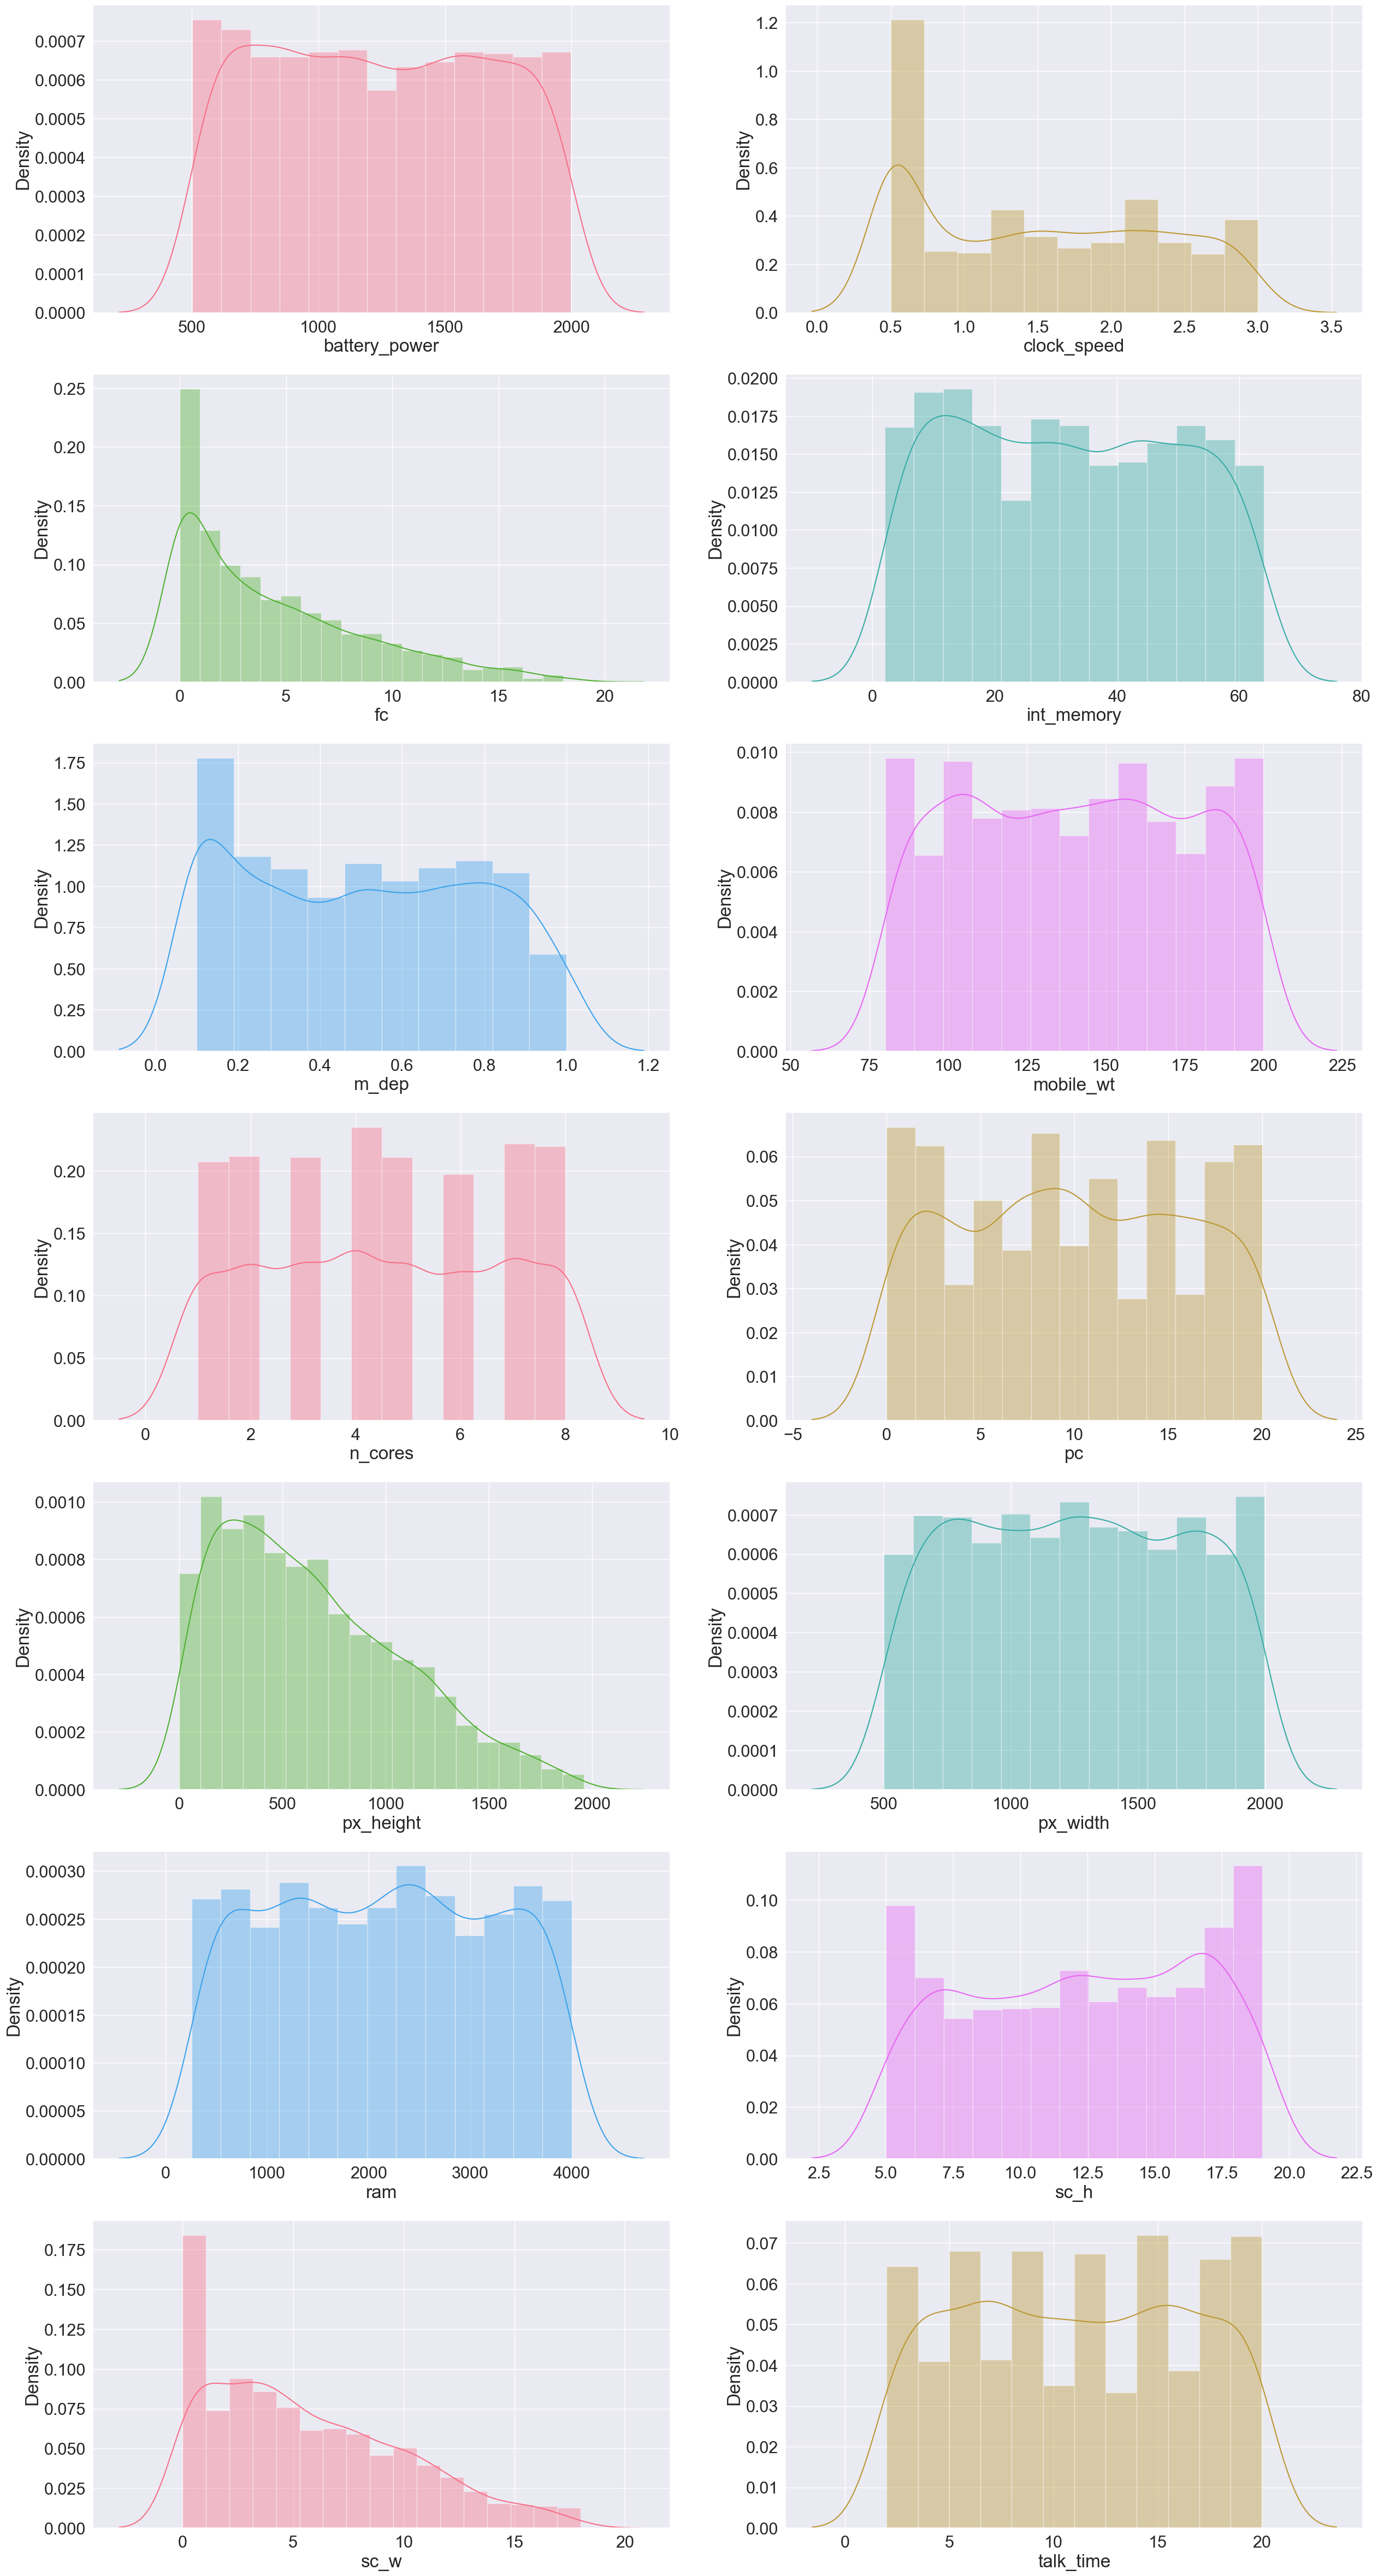

In [51]:
n_rows = 7
n_cols = 2
colors = sns.color_palette('husl')
sns.set(font_scale=2)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30,60))
for i, column in enumerate(x.columns):
    sns.distplot(df[column], ax=axes[i // n_cols, i % n_cols], color=colors[i % len(colors)])
plt.show()

In [52]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

model_9 = DecisionTreeClassifier()
model_9.fit(X_train,y_train)

print('train -',model_9.score(X_train,y_train))
print('test -',model_9.score(X_test,y_test))

train - 1.0
test - 0.8366666666666667


In [53]:
from IPython.display import Image
from sklearn import tree 
from os import system

In [54]:
train_char_label = ['0', '1',"2","3"]
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(model_9, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
x=df.drop(['price_range'],axis=1)
y=df.price_range

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [58]:
model7= GaussianNB()
model7.fit(x_train,y_train)

GaussianNB()

In [59]:
model7.score(x_train,y_train)

0.8164285714285714

In [60]:
model7.score(x_test,y_test)

0.8283333333333334

In [61]:
model_n=SVC(kernel="linear",gamma="auto",C=12)
model_n.fit(x1_train,y1_train)

SVC(C=12, gamma='auto', kernel='linear')

In [62]:
model_n.score(x1_train,y1_train)

0.9835714285714285

In [63]:
model_n.score(x1_test,y1_test)

0.97